In [16]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [17]:
data = pd.read_csv("ex2data1.txt", header = None, names = ["Exam 1 Score", "Exam 2 Score", "Accepted"])
m = len(data["Accepted"])
x0 = np.ones(m)

exam1 = np.array(data["Exam 1 Score"])
exam2 = np.array(data["Exam 2 Score"])
X = np.array([x0, exam1, exam2]).T
y = np.array(data["Accepted"]).reshape(m,1)
m, n = X.shape

X[:5]

array([[ 1.        , 34.62365962, 78.02469282],
       [ 1.        , 30.28671077, 43.89499752],
       [ 1.        , 35.84740877, 72.90219803],
       [ 1.        , 60.18259939, 86.3085521 ],
       [ 1.        , 79.03273605, 75.34437644]])

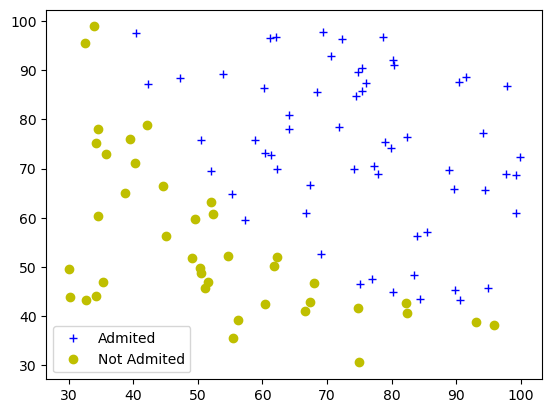

In [18]:
pos = np.where(y==1)[0]
neg = np.where(y==0)[0]

plt.plot(X[pos, 1], X[pos, 2], 'b+', label='Admited')
plt.plot(X[neg,1], X[neg,2], 'yo', label='Not Admited')
plt.legend()
plt.show()

In [19]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [20]:
def compute_cost(theta, X, y):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    #cost = (1/m) * (-y.T @ np.log(h) - (1-y).T @ np.log(h)) 
    return cost

In [21]:
def compute_gradient(theta, X, y):
    m = len(y)
    h = sigmoid(X @ theta)
    gradient = (1/m) * (X.T @ (h-y))
    return gradient

In [22]:
initial_theta = np.random.rand(n) * 0.1
y = y.reshape(m)
cost = compute_cost(initial_theta, X, y)
print("Initial cost:", cost)
gradient = compute_gradient(initial_theta, X, y)
print("Initial gradient:", gradient)

# # gradient = compute_gradient(initial_theta, X, y)
# # print(gradient)

Initial cost: 1.19137511983435
Initial gradient: [ 0.36568709 18.92304576 19.81746452]


In [23]:
from scipy.optimize import minimize
result = minimize(compute_cost, initial_theta, args = (X, y),
                   method = 'CG', jac = compute_gradient, 
                   options = {"maxiter": 400, "disp" : 1})
theta = result.x
print('Conjugate gradient found the following values for theta: {}'.format(theta))

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 37
         Function evaluations: 93
         Gradient evaluations: 91
Conjugate gradient found the following values for theta: [-25.15771137   0.20620274   0.20144229]


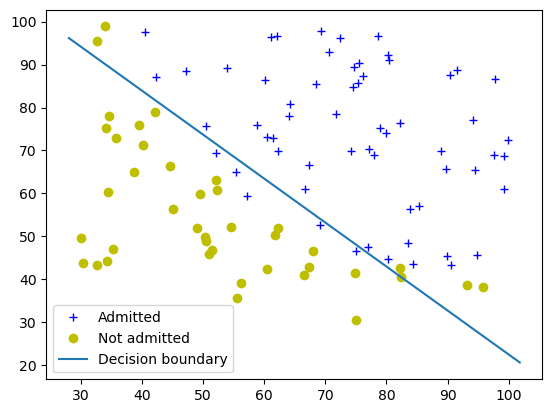

In [28]:
pos = np.where(y==1)[0]
neg = np.where(y==0)[0]

plt.plot(X[pos, 1], X[pos, 2], 'b+', label='Admitted')
plt.plot(X[neg, 1], X[neg, 2], 'yo', label='Not admitted')

plot_x = np.array([min(X[:,1])-2,  max(X[:,1])+2])
plot_y = (-1./theta[2]) * ((theta[1] * (plot_x) + theta[0]))

plt.plot(plot_x, plot_y, label='Decision boundary')

plt.legend()
plt.show()

In [25]:
prob = sigmoid(np.array([1, 45, 85]) @ theta)
print('A student with scores of 45 and 85, we predict has an admission probability of {:.2}'.format(prob))

A student with scores of 45 and 85, we predict has an admission probability of 0.78


In [26]:
p = np.zeros((m, 1))
for (i, example) in enumerate(X):
    prob = sigmoid(np.array(example.dot(theta)))
    if prob >= 0.5:
        p[i] = 1
    else:
        p[i] = 0
print('Training Accuracy: {}%'.format(np.mean(p == y.reshape(m, 1)) * 100))

Training Accuracy: 89.0%
